In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import random
from sklearn.metrics import accuracy_score
from sklearn import metrics  
import math
from sklearn.metrics import r2_score
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 

# Assign colum names to the dataset
names = ['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age','class']

# Read dataset to pandas dataframe
dataset = pd.read_csv("D:\CODING\AI_ML\ML_Task_Acc\MLAssignment.csv", names=names)

dataset.head()

,ntp,pgc,dbp,tst,si,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
dataset.describe()

,ntp,pgc,dbp,tst,si,bmi,dpf,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


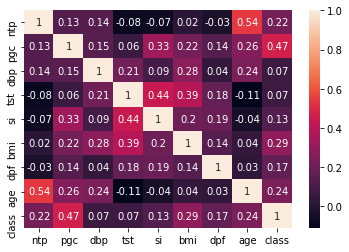

In [3]:
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [4]:
feature_cols = ['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age']

In [5]:
X = dataset[feature_cols] 
Y = dataset['class']

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression()

In [9]:
print('X dimentions is:',X.shape)
print('Y dimentions is:',Y.shape)

X dimentions is: (768, 8)
Y dimentions is: (768,)


In [12]:
logModel.fit(X_train,Y_train)

D:\CODING\Anaconda_env\DNN-AWS-PY36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
Y_pre=logModel.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pre)

array([[90,  9],
       [25, 30]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pre)

0.7792207792207793

In [16]:
logModel.intercept_, logModel.coef_

(array([-5.38779956]),
 array([[ 1.18772706e-01,  2.86867722e-02, -1.89002516e-02,
         -1.96189841e-03, -2.16670762e-04,  5.41690497e-02,
          4.84994559e-01,  3.51601174e-03]]))

In [17]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
#print('AUROC: ', roc_auc_score(truth, scores))
print('\nConfusion Matrix: \n', confusion_matrix(Y_test,Y_pre))
print('\nAccuracy Score: ', accuracy_score(Y_test,Y_pre))
print('\nClassification Report: \n', classification_report(Y_test,Y_pre))


Confusion Matrix: 
 [[90  9]
 [25 30]]

Accuracy Score:  0.7792207792207793

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

   micro avg       0.78      0.78      0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [31]:
model2 = LogisticRegression(C=1e15, max_iter=3000,fit_intercept=True,solver='sag')
model2.fit(X_train,Y_train)

C:\Users\ramoj\.conda\envs\neural-network-projects-python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
Y_pre=model2.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
#print('AUROC: ', roc_auc_score(truth, scores))
print('\nConfusion Matrix: \n', confusion_matrix(Y_test,Y_pre))
print('\nAccuracy Score: ', accuracy_score(Y_test,Y_pre))
print('\nClassification Report: \n', classification_report(Y_test,Y_pre))


Confusion Matrix: 
 [[88 11]
 [40 15]]

Accuracy Score:  0.6688311688311688

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.89      0.78        99
           1       0.58      0.27      0.37        55

    accuracy                           0.67       154
   macro avg       0.63      0.58      0.57       154
weighted avg       0.65      0.67      0.63       154

